## 4.1 数据清洗 ##

### 4.1.1 空值和缺失值的处理 ###

In [2]:
from pandas import DataFrame, Series
import pandas as pd
from numpy import NaN
series_obj = Series([1, None, NaN])
pd.isnull(series_obj)       # 检查是否为空值或缺失值

0    False
1     True
2     True
dtype: bool

In [2]:
from pandas import DataFrame, Series
import pandas as pd
from numpy import NaN
series_obj = Series([1, None, NaN])
pd.notnull(series_obj)       # 检查是否不为空值或缺失值

0     True
1    False
2    False
dtype: bool

In [3]:
import pandas as pd
import numpy as np
df_obj = pd.DataFrame({"类别":['小说', '散文随笔', '青春文学', '传记'],
                       "书名":[np.nan, '《皮囊》', '《旅程结束时》', '《老舍自传》'],
                       "作者":["老舍", None, "张其鑫", "老舍"]})
df_obj

,类别,书名,作者
0,小说,NaN,老舍
1,散文随笔,《皮囊》,None
2,青春文学,《旅程结束时》,张其鑫
3,传记,《老舍自传》,老舍


In [4]:
df_obj.dropna()     # 删除数据集中的空值和缺失值

,类别,书名,作者
2,青春文学,《旅程结束时》,张其鑫
3,传记,《老舍自传》,老舍


In [5]:
import pandas as pd
import numpy as np
from numpy import NaN
df_obj = pd.DataFrame({'A': [1, 2, 3, NaN],
                       'B': [NaN, 4, NaN, 6],
                       'C': ['a', 7, 8, 9],
                       'D':[NaN, 2, 3, NaN]})
df_obj

,A,B,C,D
0,1.0,NaN,a,NaN
1,2.0,4.0,7,2.0
2,3.0,NaN,8,3.0
3,NaN,6.0,9,NaN


In [6]:
df_obj.fillna('66.0')   # 使用66替换缺失值

,A,B,C,D
0,1,66.0,a,66.0
1,2,4,7,2
2,3,66.0,8,3
3,66.0,6,9,66.0


In [7]:
import pandas as pd
import numpy as np
from numpy import NaN
df_obj = pd.DataFrame({'A': [1, 2, 3, NaN],
                       'B': [NaN, 4, NaN, 6],
                       'C': ['a', 7, 8, 9],
                       'D': [NaN, 2, 3, NaN]})
df_obj

,A,B,C,D
0,1.0,NaN,a,NaN
1,2.0,4.0,7,2.0
2,3.0,NaN,8,3.0
3,NaN,6.0,9,NaN


In [9]:
df_obj.fillna({'A': 4.0, 'B': 5.0})  # 指定列填充数据

,A,B,C,D
0,1.0,5.0,a,NaN
1,2.0,4.0,7,2.0
2,3.0,5.0,8,3.0
3,4.0,6.0,9,NaN


In [8]:
import pandas as pd
import numpy as np
from numpy import NaN
df = pd.DataFrame({'A': [1, 2, 3, None],
                   'B': [NaN, 4, None, 6],
                   'C': ['a', 7, 8, 9],
                   'D': [None, 2, 3, NaN]})
df

,A,B,C,D
0,1.0,NaN,a,NaN
1,2.0,4.0,7,2.0
2,3.0,NaN,8,3.0
3,NaN,6.0,9,NaN


In [9]:
df.fillna(method='ffill')   # 使用前向填充的方式替换空值或缺失值

,A,B,C,D
0,1.0,NaN,a,NaN
1,2.0,4.0,7,2.0
2,3.0,4.0,8,3.0
3,3.0,6.0,9,3.0


### 4.1.2 重复值的处理 ###

In [10]:
import pandas as pd
person_info = pd.DataFrame({'id': [1, 2, 3, 4, 4, 5],
                            'name': ['小铭', '小月月', '彭岩', '刘华', '刘华', '周华'],
                            'age': [18, 18, 29, 58, 58, 36],
                            'height': [180, 180, 185, 175, 175, 178],
                            'gender': ['女', '女', '男', '男', '男', '男']})
person_info.duplicated()         # 从前向后查找和判断是否有重复值

0    False
1    False
2    False
3    False
4     True
5    False
dtype: bool

In [11]:
import pandas as pd
person_info = pd.DataFrame({'id': [1, 2, 3, 4, 4, 5],
                            'name': ['小铭', '小月月', '彭岩', '刘华', '刘华', '周华'],
                            'age': [18, 18, 29, 58, 58, 36],
                            'height': [180, 180, 185, 175, 175, 178],
                            'gender': ['女', '女', '男', '男', '男', '男']})
person_info. drop_duplicates()

,id,name,age,height,gender
0,1,小铭,18,180,女
1,2,小月月,18,180,女
2,3,彭岩,29,185,男
3,4,刘华,58,175,男
5,5,周华,36,178,男


### 4.1.3 异常值的处理 ###

In [16]:
import pandas as pd
import numpy as np
# ser1 表示传入DataFrame的某一列
def three_sigma(ser1): 
    # 求平均值
    mean_value = ser1.mean()
    # 求标准差
    std_value = ser1.std()
    print(mean_value - 3 * std_value)
    print(ser1.mean() + 3 * ser1.std())
    # 位于(μ-3σ,μ+3σ)区间的数据是正常的，不在这个区间的数据为异常的
    # ser1中的数值小于μ-3σ或大于μ+3σ均为异常值
    # 一旦发现有异常值，就标注为True，否则标注为False
    rule = (mean_value - 3 * std_value > ser1) | (ser1.mean() + 3 * ser1.std() < ser1)
    # 返回异常值的位置索引
    index = np.arange(ser1.shape[0])[rule]
    # 获取异常数据
    outrange = ser1.iloc[index]
    return outrange

In [17]:
# 导入需要使用的包
file = open('example_data.csv')
df = pd.read_csv(file)
df

,A,B
0,1,2
1,2,3
2,3,8
3,4,5
4,5,6
5,560,7
6,2,8
7,3,9
8,3,0
9,4,3


In [18]:
three_sigma(df['A'])

-385.17620498955876
487.9130470948219


5    560
Name: A, dtype: int64

In [15]:
three_sigma(df['B'])

Series([], Name: B, dtype: int64)

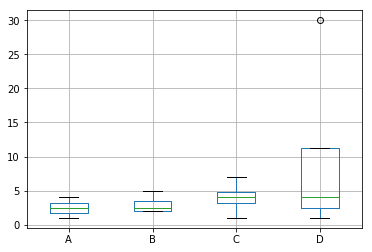

In [19]:
import pandas as pd
%matplotlib inline
df = pd.DataFrame({'A': [1, 2, 3, 4],
                   'B': [2, 3, 5, 2],
                   'C': [1, 4, 7, 4],
                   'D': [1, 5, 30, 3]})
df.boxplot(column=['A', 'B', 'C', 'D'])

In [20]:
import pandas as pd
df = pd.DataFrame ({'菜谱名': ['红烧肉', '铁板鱿鱼', 
                    '小炒肉', '干锅鸭掌', '酸菜鱼'],
                    '价格': [388, 25, 26, 388, 35]})
df.replace(to_replace=388,value=38.8)

,菜谱名,价格
0,红烧肉,38.8
1,铁板鱿鱼,25.0
2,小炒肉,26.0
3,干锅鸭掌,38.8
4,酸菜鱼,35.0


### 4.1.4 更改数据类型 ###

In [21]:
import pandas as pd
df = pd.DataFrame({'A':['5', '6', '7'], 'B':['3', '2', '1']})
df.dtypes  # 查看数据的类型

A    object
B    object
dtype: object

In [22]:
import pandas as pd
# 创建DataFrame对象，数据的类型为int
df = pd.DataFrame({'A': ['5', '6', '7'], 'B': ['3', '2', '1']},
                  dtype='int')
df.dtypes

d:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:2591: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return bool(asarray(a1 == a2).all())


A    int32
B    int32
dtype: object

In [23]:
import pandas as pd
df = pd.DataFrame({'A': ['1', '1.2', '4.2'],
                   'B': ['-9', '70', '88'],
                   'C': ['x', '5.0', '0']})
df.dtypes

A    object
B    object
C    object
dtype: object

In [24]:
df['B'] = df['B'].astype(dtype='int')  # 强制转换为int类型
df.dtypes

A    object
B     int32
C    object
dtype: object

In [25]:
import pandas as pd
ser_obj = pd.Series(['1', '1.2', '4.2'])
ser_obj

0      1
1    1.2
2    4.2
dtype: object

In [26]:
# 转换object类型为float类型
pd.to_numeric(ser_obj, errors='raise')

0    1.0
1    1.2
2    4.2
dtype: float64

## 4.2数据合并 ##

### 4.2.1 轴向堆叠数据 ###

In [27]:
import pandas as pd
df1 = pd.DataFrame({'A': ['A0', 'A0', 'A1'],
                    'B': ['B0', 'B0', 'B1']})
df2 = pd.DataFrame({'C': ['C0', 'C0', 'C1', 'C3'],
                    'D': ['D0', 'D2', 'D2', 'D3']})
# 横向堆叠合并df1和df2，采用外连接的方式
pd.concat([df1, df2], join='outer', axis=1)

,A,B,C,D
0,A0,B0,C0,D0
1,A0,B0,C0,D2
2,A1,B1,C1,D2
3,NaN,NaN,C3,D3


In [28]:
import pandas as pd
first = pd.DataFrame({'A': ['A0', 'A1', 'A2'],
                      'B': ['B0', 'B1', 'B2'],
                      'C': ['C0', 'C1', 'C2']})
second = pd.DataFrame({'B': ['B3', 'B4', 'B5'],
                       'C': ['C3', 'C4', 'C5'],
                       'D': ['D3', 'D4', 'D5']})
pd.concat([first, second], join='inner', axis=0)

,B,C
0,B0,C0
1,B1,C1
2,B2,C2
0,B3,C3
1,B4,C4
2,B5,C5


### 4.2.2 主键合并数据 ###

In [29]:
import pandas as pd
left = pd.DataFrame({'key':['K0','K1','K2'],
                       'A':['A0','A1','A2'],
                        'B':['B0','B1','B2']})
right = pd.DataFrame({'key':['K0','K1','K2','K3'],
                         'C':['C0','C1','C2','C3'],
                         'D':['D0','D1','D2','D3']})
pd.merge(left, right, on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,A2,B2,C2,D2


In [31]:
import pandas as pd
left = pd.DataFrame({'key':['K0','K1','K2'],
                       'A':['A0','A1','A2'],
                       'B':['B0','B1','B2']})
right = pd.DataFrame({'key':['K0','K5','K2','K4'],
                         'B':['B0','B1','B2','B5'],
                         'C':['C0','C1','C2','C3'],
                         'D':['D0','D1','D2','D3']})
pd.merge(left, right, on=['key', 'B'])

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K2,A2,B2,C2,D2


In [32]:
import pandas as pd
left = pd.DataFrame({'A':['A0','A1','A2'],
                       'B':['B0','B1','B2']})
right = pd.DataFrame({'C':['C0','C1','C2'],
                         'D':['D0','D1','D2']})
pd.merge(left,right,how='outer',left_index=True,right_index=True)

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2


### 4.2.3 根据索引合并数据 ### 

In [33]:
import pandas as pd
left = pd.DataFrame({'A': ['A0', 'A1', 'A2'],
                        'B': ['B0', 'B1', 'B2']})
right = pd.DataFrame({'C': ['C0', 'C1', 'C2'],
                         'D': ['D0', 'D1', 'D2']},
                        index=[ 'a','b','c'])
left.join(right, how='outer')

,A,B,C,D
0,A0,B0,NaN,NaN
1,A1,B1,NaN,NaN
2,A2,B2,NaN,NaN
a,NaN,NaN,C0,D0
b,NaN,NaN,C1,D1
c,NaN,NaN,C2,D2


In [34]:
import pandas as pd
left = pd.DataFrame({'A': ['A0', 'A1', 'A2'],
                        'B': ['B0', 'B1', 'B2'],
                      'key': ['K0', 'K1', 'K2']})
right = pd.DataFrame({'C': ['C0', 'C1','C2'],
                         'D': ['D0', 'D1','D2']},
                        index=['K0', 'K1','K2'])
# on参数指定连接的列名
left.join(right, how='left', on='key')

,A,B,key,C,D
0,A0,B0,K0,C0,D0
1,A1,B1,K1,C1,D1
2,A2,B2,K2,C2,D2


### 4.2.4 合并重叠数据 ###

In [35]:
import pandas as pd
import numpy as np
from numpy import NAN
left = pd.DataFrame({'A': [np.nan, 'A1', 'A2', 'A3'],
                        'B': [np.nan, 'B1', np.nan, 'B3'],
                        'key': ['K0', 'K1', 'K2', 'K3']})
left

,A,B,key
0,NaN,NaN,K0
1,A1,B1,K1
2,A2,NaN,K2
3,A3,B3,K3


In [36]:
right = pd.DataFrame({'A': ['C0', 'C1','C2'],
                         'B': ['D0', 'D1','D2']},
                         index=[1,0,2])
right


,A,B,key
0,C1,D1,K0
1,A1,B1,K1
2,A2,D2,K2
3,A3,B3,K3


In [37]:
# 用right的数据填充left缺失的部分
left.combine_first(right) 

,A,B,key
0,C1,D1,K0
1,A1,B1,K1
2,A2,D2,K2
3,A3,B3,K3


## 4.3	 数据重塑 ##

### 4.3.1	 重塑层次化索引 ###

In [38]:
import pandas as pd
df = pd.DataFrame({'A':['A0','A1','A2'],
                 'B':['B0','B1','B2']})
# 将df进行重塑
result = df.stack()
result

0  A    A0
   B    B0
1  A    A1
   B    B1
2  A    A2
   B    B2
dtype: object

In [39]:
type(result)

pandas.core.series.Series

In [40]:
import pandas as pd
df = pd.DataFrame({'A':['A0','A1','A2'],
                      'B':['B0','B1','B2']})
res = df.stack()  #　将df重塑为Series对象
res.unstack()      #　将Series对象转换成df

,A,B
0,A0,B0
1,A1,B1
2,A2,B2


In [41]:
import pandas as pd
import numpy as np
df = pd.DataFrame(np.array([[26,20,22,26],[30,25,24,20]]),
                   index=['男生人数','女生人数'],
                   columns=[['一楼','一楼','二楼','二楼'],
                              ['A教室','B教室','A教室','B教室']])
df.stack()

一楼  二楼
男生人数 A教室  26  22
     B教室  20  26
女生人数 A教室  30  24
     B教室  25  20

In [42]:
df.stack(level=0)   # 旋转外层索引

A教室  B教室
男生人数 一楼   26   20
     二楼   22   26
女生人数 一楼   30   25
     二楼   24   20

### 4.3.2	 轴向旋转 ###

In [43]:
import pandas as pd
df =  pd.DataFrame({'商品名称': ['荣耀9青春版','小米6x','OPPO A1',
                   '荣耀9青春版','小米6x','OPPO A1'],
                   '出售日期': ['2017年5月25日', '2017年5月25日',
                   '2017年5月25日','2017年6月18日',
                   '2017年6月18日', '2017年6月18日'],
                   '价格': ['999元', '1399元', '1399元',
                   '800元', '1200元', '1250元']})
df.pivot(index='出售日期', columns='商品名称', values='价格')

商品名称,OPPO A1,小米6x,荣耀9青春版
出售日期,,,
2017年5月25日,1399元,1399元,999元
2017年6月18日,1250元,1200元,800元


## 4.4	转换数据 ##

### 4.4.1	 重命名轴索引 ###

In [44]:
import pandas as pd
df = pd.DataFrame({'A':['A0', 'A1', 'A2', 'A3'],
                 'B':['B0', 'B1', 'B2', 'B3'],
                 'C':['C0', 'C1', 'C2', 'C3']})
df

,A,B,C
0,A0,B0,C0
1,A1,B1,C1
2,A2,B2,C2
3,A3,B3,C3


In [45]:
# 重命名列索引的名称，并且在原有数据上进行修改
df.rename(columns={'A':'a', 'B':'b', 'C':'c'}, inplace=True)
df

,a,b,c
0,A0,B0,C0
1,A1,B1,C1
2,A2,B2,C2
3,A3,B3,C3


In [46]:
import pandas as pd
df = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                   'B': ['B0', 'B1', 'B2', 'B3'],
                   'C': ['C0', 'C1', 'C2', 'C3']})
df.rename(str.lower, axis='columns')

,a,b,c
0,A0,B0,C0
1,A1,B1,C1
2,A2,B2,C2
3,A3,B3,C3


In [47]:
import pandas as pd
df = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'],
                    'B': ['B0', 'B1', 'B2', 'B3'],
                    'C': ['C0', 'C1', 'C2', 'C3']})
df.rename(index={1: 'a', 2: 'b'}, inplace=True)
df

,A,B,C
0,A0,B0,C0
a,A1,B1,C1
b,A2,B2,C2
3,A3,B3,C3


### 4.4.2	 离散化连续数据 ###

In [48]:
import pandas as pd
# 使用pandas的cut函数划分年龄组
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 32]
bins = [0, 18, 25, 35, 60, 100]
cuts = pd.cut(ages, bins)
cuts

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (35, 60], (25, 35], (60, 100], (35, 60], (25, 35]]
Length: 11
Categories (5, interval[int64]): [(0, 18] < (18, 25] < (25, 35] < (35, 60] < (60, 100]]

In [49]:
pd.cut(ages, bins=bins, right=False)

[[18, 25), [18, 25), [25, 35), [25, 35), [18, 25), ..., [35, 60), [25, 35), [60, 100), [35, 60), [25, 35)]
Length: 11
Categories (5, interval[int64]): [[0, 18) < [18, 25) < [25, 35) < [35, 60) < [60, 100)]

### 4.4.3	 哑变量处理类别型数据 ###

In [50]:
import pandas as pd
df1 = pd.DataFrame({'职业': ['工人', '学生', '司机', '教师', '导游']})
pd.get_dummies(df1, prefix=['col'])  # 哑变量处理

,col_司机,col_学生,col_导游,col_工人,col_教师
0,0,0,0,1,0
1,0,1,0,0,0
2,1,0,0,0,0
3,0,0,0,0,1
4,0,0,1,0,0
